# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 6, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) (the one you have downloaded from Absalon) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. 

## Problems from Exercise Set 2:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 2.3.4:** The code below runs through some of the steps we completed in exercise 2.3.4 in Module 2. As we are not going to request the website but load the data from a csv file, your task is to **rewrite parts of the function**. In particular, you need to do the following:
>1. Rename the function to `process_weather` instead of `load_weather`. 
>2. The function should now  take a `dataframe` as input. 
>3. Consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The documentation string should also be rewritten appropriately. 
>4. The function contains a sorting step. **Change it so that it first sorts by _station_, then by _datetime_. The sorting should be ascending for _station_ and descending for _datetime_.** 
>5. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `process_weather` function to this dataframe, and store the result in the variable `df_weather_period`.

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [32]:
# YOUR CODE HERE
import pandas as pd

def process_weather(dataframe):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        dataframe\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values('station')\
            .sort_values('datetime', ascending = False)\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out


df_weather = pd.read_csv('weather_data_1870-1875.csv')

df_weather_period = process_weather(df_weather)

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,USW00094728,18751231,TMAX,7.2,US,1875-12-31,12,1875
1,DA000025140,18751231,TMAX,3.2,DA,1875-12-31,12,1875
2,CA001167635,18751231,TMAX,7.2,CA,1875-12-31,12,1875
3,CA001105550,18751231,TMAX,7.2,CA,1875-12-31,12,1875
4,CA001012700,18751231,TMAX,8.9,CA,1875-12-31,12,1875
...,...,...,...,...,...,...,...,...
132312,CA006148100,18700101,TMAX,0.6,CA,1870-01-01,1,1870
132313,BE000006447,18700101,TMAX,7.2,BE,1870-01-01,1,1870
132314,USC00271682,18700101,TMAX,8.9,US,1870-01-01,1,1870
132315,CA006106362,18700101,TMAX,-3.9,CA,1870-01-01,1,1870


> **Ex. 2.NEW (Not seen in module 2):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these three observations be characterized as? Drop ALL observations from the associated station from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,USW00094728,18751231,TMAX,7.2,US,1875-12-31,12,1875
1,DA000025140,18751231,TMAX,3.2,DA,1875-12-31,12,1875
2,CA001167635,18751231,TMAX,7.2,CA,1875-12-31,12,1875
3,CA001105550,18751231,TMAX,7.2,CA,1875-12-31,12,1875
4,CA001012700,18751231,TMAX,8.9,CA,1875-12-31,12,1875
...,...,...,...,...,...,...,...,...
131815,CA006148100,18700101,TMAX,0.6,CA,1870-01-01,1,1870
131816,BE000006447,18700101,TMAX,7.2,BE,1870-01-01,1,1870
131817,USC00271682,18700101,TMAX,8.9,US,1870-01-01,1,1870
131818,CA006106362,18700101,TMAX,-3.9,CA,1870-01-01,1,1870


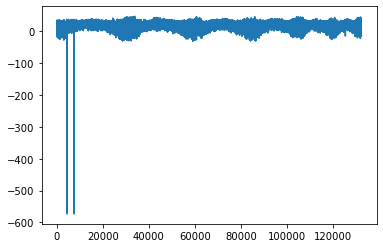

In [33]:
# YOUR CODE HERE
df_weather_period.obs_value.plot()

df_weather_period[df_weather_period.obs_value < -50]

#These three observations can be characterized as outliers.

#Drop all observations from station USW00023068 - the one with the outliers - and reset index
df_weather_period = df_weather_period[df_weather_period.station != 'USW00023068'].reset_index(drop = True)

df_weather_period

> **Ex. 2.3.2:** 
Continuing with the `df_weather_period` from last exercise, do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [37]:
# YOUR CODE HERE

#1 - Convert area code to category
df_weather_period.area = df_weather_period.area.astype('category')

#2 - Transform the obs value to category
df_weather_period['obs_value_cat'] = pd.qcut(df_weather_period.obs_value, q = [0, 0.10, 0.90, 1])

#3 rename the three intervals, and make a new column for this variable

df_weather_period['obs_value_cat_labelled'] = pd.qcut(df_weather_period.obs_value, q = [0, 0.10, 0.90, 1], labels = ["cold", "medium", "hot"])

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labelled
0,USW00094728,18751231,TMAX,7.2,US,1875-12-31,12,1875,"(-1.1, 28.3]",medium
1,DA000025140,18751231,TMAX,3.2,DA,1875-12-31,12,1875,"(-1.1, 28.3]",medium
2,CA001167635,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium
3,CA001105550,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium
4,CA001012700,18751231,TMAX,8.9,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium
...,...,...,...,...,...,...,...,...,...,...
131815,CA006148100,18700101,TMAX,0.6,CA,1870-01-01,1,1870,"(-1.1, 28.3]",medium
131816,BE000006447,18700101,TMAX,7.2,BE,1870-01-01,1,1870,"(-1.1, 28.3]",medium
131817,USC00271682,18700101,TMAX,8.9,US,1870-01-01,1,1870,"(-1.1, 28.3]",medium
131818,CA006106362,18700101,TMAX,-3.9,CA,1870-01-01,1,1870,"(-31.101000000000003, -1.1]",cold


## Problems from Exercise Set 3:

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [38]:
# YOUR CODE HERE

#choose variables to group data on
split_vars = ['year', 'month', 'station']

#Choose variable to calculate on
apply_vars = ['obs_value']

#Make new variables tmax-mean and tmax-median
df_weather_period['tmax_mean']= df_weather_period.groupby(split_vars)[apply_vars].transform('mean')
df_weather_period['tmax_median']= df_weather_period.groupby(split_vars)[apply_vars].transform('median')

df_weather_period


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labelled,tmax_mean,tmax_median
0,USW00094728,18751231,TMAX,7.2,US,1875-12-31,12,1875,"(-1.1, 28.3]",medium,3.890323,3.90
1,DA000025140,18751231,TMAX,3.2,DA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,2.025806,2.70
2,CA001167635,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,4.464516,4.40
3,CA001105550,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,6.741935,7.20
4,CA001012700,18751231,TMAX,8.9,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,7.661290,8.30
...,...,...,...,...,...,...,...,...,...,...,...,...
131815,CA006148100,18700101,TMAX,0.6,CA,1870-01-01,1,1870,"(-1.1, 28.3]",medium,-1.665385,-0.85
131816,BE000006447,18700101,TMAX,7.2,BE,1870-01-01,1,1870,"(-1.1, 28.3]",medium,4.622581,5.90
131817,USC00271682,18700101,TMAX,8.9,US,1870-01-01,1,1870,"(-1.1, 28.3]",medium,4.429032,5.00
131818,CA006106362,18700101,TMAX,-3.9,CA,1870-01-01,1,1870,"(-31.101000000000003, -1.1]",cold,-3.716129,-2.80


> **Ex. 3.3.2:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'CA006110549'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures. Try to make your plot look like the one below. 
<img src="station_data_plot.png">

Text(0.5, 1.0, 'Average and bands for temperature at CA006110549')

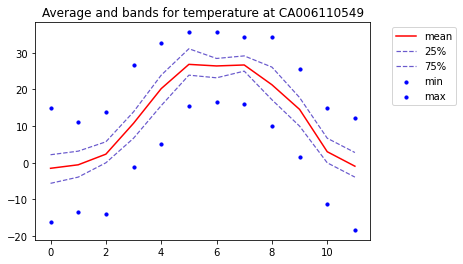

In [113]:
# YOUR CODE HERE
import seaborn 
import matplotlib.pyplot as plt

station_s = df_weather_period[df_weather_period.station == 'CA006110549']

describe_df = station_s['obs_value'].groupby(station_s['month']).describe()


plt.figure()
plt.plot(range(12), describe_df['mean'], color = 'red', markersize = 100, label = 'mean')
plt.plot(range(12), describe_df['25%'], linestyle = 'dashed', color = 'slateblue', lw = 1.2, label = '25%')
plt.plot(range(12), describe_df['75%'], linestyle = 'dashed', color = 'slateblue',  lw = 1.2, label = '75%')
plt.scatter(range(12), describe_df['min'], color = 'blue', s = 10, label = 'min')
plt.scatter(range(12), describe_df['max'], color = 'blue', s = 10, label = 'max')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average and bands for temperature at CA006110549')

> **Ex. 3.3.3:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [121]:
# YOUR CODE HERE
column_names = ['station', 'Latitude', 'Longitude', 'Elevation', 'State', 'Name', 'GSN Flag', 'HCN/CRN Flag', "WMO ID"]

location_df = pd.read_fwf('ghcnd-stations.txt', header=None, names=column_names)

final_data = pd.merge(df_weather_period, location_df, left_on='station', right_on='station', how='left')


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labelled,tmax_mean,tmax_median,Latitude,Longitude,Elevation,State,Name,GSN Flag,HCN/CRN Flag,WMO ID
0,USW00094728,18751231,TMAX,7.2,US,1875-12-31,12,1875,"(-1.1, 28.3]",medium,3.890323,3.90,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR,NaN,NaN,72506.0,NaN
1,DA000025140,18751231,TMAX,3.2,DA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,2.025806,2.70,55.4500,8.4000,4.0,NORDBY (FANO),NaN,NaN,NaN,NaN
2,CA001167635,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,4.464516,4.40,50.4167,121.5000,232.0,SPENCES BRIDGE,NaN,NaN,NaN,NaN
3,CA001105550,18751231,TMAX,7.2,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,6.741935,7.20,49.2167,122.9333,119.0,NEW WESTMINSTER,NaN,NaN,NaN,NaN
4,CA001012700,18751231,TMAX,8.9,CA,1875-12-31,12,1875,"(-1.1, 28.3]",medium,7.661290,8.30,48.4333,123.4167,14.0,ESQUIMALT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131815,CA006148100,18700101,TMAX,0.6,CA,1870-01-01,1,1870,"(-1.1, 28.3]",medium,-1.665385,-0.85,43.3833,-81.0000,363.0,STRATFORD,NaN,NaN,NaN,NaN
131816,BE000006447,18700101,TMAX,7.2,BE,1870-01-01,1,1870,"(-1.1, 28.3]",medium,4.622581,5.90,50.8000,4.3500,104.0,UCCLE,NaN,GSN,6447.0,NaN
131817,USC00271682,18700101,TMAX,8.9,US,1870-01-01,1,1870,"(-1.1, 28.3]",medium,4.429032,5.00,43.2050,-71.5350,82.3,CONCORD,NaN,NaN,NaN,NaN
131818,CA006106362,18700101,TMAX,-3.9,CA,1870-01-01,1,1870,"(-31.101000000000003, -1.1]",cold,-3.716129,-2.80,45.8333,-77.1500,125.0,PEMBROKE EDDY MATCH,NaN,NaN,NaN,NaN


## Problems from Exercise Set 4:

> **Ex. 4.3.5:** This exercise consists of a set of small subelements: 
>
> 0. Show the first five rows of the titanic dataset. What information is in the dataset?
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Combine the two of the figures you created above into a two-panel figure and save it on your computer.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


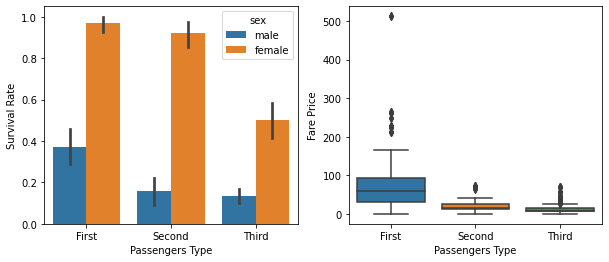

In [133]:
# YOUR CODE HERE
import seaborn as sns
titanic = sns.load_dataset('titanic')

#0
print(titanic.head(5)) 

"""
Information in the dataset includes passengerdata, such as demographical data (age, sex, etc.), 
and data relevant to the ship-situation, such as survival, fare price, and class.  
"""


f,ax = plt.subplots(1,2, figsize=(10,4))

sns.barplot(x="class", y="survived", hue="sex", data=titanic, ax=ax[0])
# It does not make sense to print it as a boxplot, as all y-values are binary - \
#thus, the observations will not be placed around the mean.

sns.boxplot( y="fare", x="class", data=titanic, ax = ax[1])

ax[1].set(xlabel = "Passengers Type", ylabel = 'Fare Price')
ax[0].set(xlabel = "Passengers Type", ylabel = 'Survival Rate')


f.savefig('titanic_ohno.png')

> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
>
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

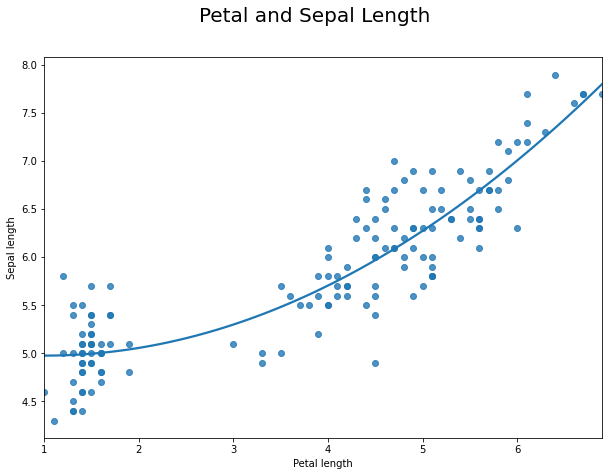

In [135]:
# YOUR CODE HERE
iris = sns.load_dataset('iris')

scatter, ax = plt.subplots(figsize = (10,7))
ax = sns.regplot( y= "sepal_length", x= "petal_length", data = iris,
            order = 2, ci =None)

ax.set(xlabel = "Petal length", ylabel = 'Sepal length')
plt.suptitle("Petal and Sepal Length").set_fontsize(20)

"""
We really like this way of illustrating the petal and sepals (though we know nothing about it :))
It is obvious that there is a connection between petals and sepals - the regression line really makes
that clear.
"""


> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

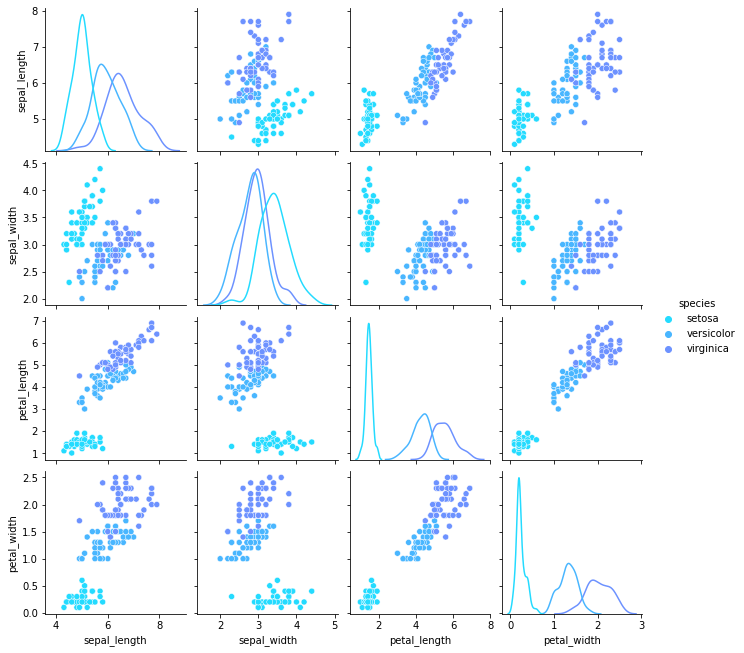

In [136]:
# YOUR CODE HERE
sns.set_palette("cool")

sns.pairplot(iris, hue = 'species', height=2.3, diag_kws=dict(fill = False))

"""The diag_kws argument helps change all diagrams in the diagonal."""

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [139]:
# YOUR CODE HERE
import requests

url = 'https://job.jobnet.dk/CV/FindWork/Search?Offset=20'

response = requests.get(url)

frame = response.json()

frame.keys()

jobs = frame['JobPositionPostings']
df_jobs = pd.DataFrame.from_dict(jobs)
df_jobs


21840


,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Tjener søges,Tjener søges,TJENER \n \n A Hereford Beefstouw på Sk...,"A Hereford Beefstouw, Skovshoved",Strandvejen 267,2920,Charlottenlund,...,75148712,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401007,https://job.jobnet.dk/CV/FindWork/Details/5401007,True,5401007,55.7589,12.5969
1,0,True,1.0,"Mødebookere, Benalmadena, Malaga, Spanien","Mødebookere, Benalmadena, Malaga, Spanien","<p>Wecallit SL, Malaga, Spanien, søger mødeboo...","Wecallit SL, Malaga",,,,...,99999999,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401004,https://job.jobnet.dk/CV/FindWork/Details/5401004,False,5401004,0.0000,0.0000
2,0,False,1.0,Dygtige montører til internationalt designbrand,Dygtige montører til internationalt designbrand,<p>Fredericia søger en række passionerede prod...,FREDERICIA FURNITURE A/S,Treldevej 183,7000,Fredericia,...,45607313,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5377982,https://job.jobnet.dk/CV/FindWork/Details/5377982,True,5377982,55.5892,9.7664
3,0,False,1.0,Fleet Specialist for Voi in Copenhagen,Fleet Specialist for Voi in Copenhagen,,StudentConsulting,"Frederiksborggade 15, 2. sal",1360,København K,...,31085403,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5400996,https://job.jobnet.dk/CV/FindWork/Details/5400996,True,5400996,55.6837,12.5710
4,0,False,1.0,Timelønnede tilkaldevikarer til aften- og natt...,Timelønnede tilkaldevikarer til aften- og natt...,<strong><em>Vil du være en del af en arbejdspl...,Gladsaxe Kommune,Kildebakkegaards Allé 165,2860,Søborg,...,62761113,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401001,https://job.jobnet.dk/CV/FindWork/Details/5401001,True,5401001,55.7419,12.5017
5,0,False,1.0,Det Blå Gymnasium søger cand.merc. til undervi...,Det Blå Gymnasium søger cand.merc. til undervi...,På Det Blå Gymnasium i Sønderborg oplever vi...,Business College Syd Mommark & Sønderborg Hand...,Søndre Landevej 30,6400,Sønderborg,...,13629110,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5400998,https://job.jobnet.dk/CV/FindWork/Details/5400998,True,5400998,54.9072,9.8088
6,0,False,1.0,Har du erfaring med at betjene maskiner så man...,Har du erfaring med at betjene maskiner så man...,"<p>For samarbejdspartner, søger vi kvalificere...",Norre Rekruttering aps,,9320,Hjallerup,...,40343504,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401002,https://job.jobnet.dk/CV/FindWork/Details/5401002,True,5401002,57.1787,10.1379
7,0,False,1.0,Tømrer,Tømrer,<p>Vi søger en tømrer der ved hvordan man lave...,DPO BYG ApS,Færgevej 20,3600,Frederikssund,...,36413581,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5401000,https://job.jobnet.dk/CV/FindWork/Details/5401000,True,5401000,55.8395,12.0560
8,0,True,1.0,"Salgskonsulenter, Benalmadena, Malaga, Spanien","Salgskonsulenter, Benalmadena, Malaga, Spanien","<p>Wecallit SL, Malaga, Spanien, søger salgsko...","Wecallit SL, Malaga",,,,...,99999999,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5398235,https://job.jobnet.dk/CV/FindWork/Details/5398235,False,5398235,0.0000,0.0000
9,0,False,1.0,To pædagoger til Bag Elefanterne − et godt ste...,To pædagoger til Bag Elefanterne − et godt ste...,"<strong>Vi søger to pædagoger, som brænder for...",Københavns Kommune,Borups Allé 177,2400,København NV,...,64942212,False,F

In [ ]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

> **Ex. 6.1.3.:** How many results do you find in total? Store this number as 'TotalResultCount' for later use.

In [140]:
# YOUR CODE HERE
TotalResultCount = frame['TotalResultCount']
print(TotalResultCount)

21840


## Problems from Exercise Set 7

> **Ex. 7.2.1:** Here we practice locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. Next, use the **>Inspector<** tool (*right click on the table < press inspect element*) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()